In [54]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

In [2]:
spy_data = yf.download("SPY", start="2015-01-01", end="2021-12-31")

[*********************100%***********************]  1 of 1 completed


In [3]:
spy_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,180.342667,121465900
2015-01-05,204.169998,204.369995,201.350006,201.720001,177.085770,169632600
2015-01-06,202.089996,202.720001,198.860001,199.820007,175.417740,209151400
2015-01-07,201.419998,202.720001,200.880005,202.309998,177.603714,125346700
2015-01-08,204.009995,206.160004,203.990005,205.899994,180.755249,147217800
...,...,...,...,...,...,...
2021-12-23,468.750000,472.190002,468.640015,470.600006,470.600006,56439700
2021-12-27,472.059998,477.309998,472.010010,477.260010,477.260010,56808600
2021-12-28,477.720001,478.809998,476.059998,476.869995,476.869995,47274600


In [4]:
ds=spy_data.copy()

In [5]:
ds

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,180.342667,121465900
2015-01-05,204.169998,204.369995,201.350006,201.720001,177.085770,169632600
2015-01-06,202.089996,202.720001,198.860001,199.820007,175.417740,209151400
2015-01-07,201.419998,202.720001,200.880005,202.309998,177.603714,125346700
2015-01-08,204.009995,206.160004,203.990005,205.899994,180.755249,147217800
...,...,...,...,...,...,...
2021-12-23,468.750000,472.190002,468.640015,470.600006,470.600006,56439700
2021-12-27,472.059998,477.309998,472.010010,477.260010,477.260010,56808600
2021-12-28,477.720001,478.809998,476.059998,476.869995,476.869995,47274600


C:\Users\rohit\AppData\Local\Temp/ipykernel_10728/3897570604.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


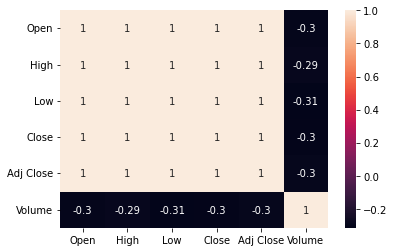

In [6]:
corr = ds.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot=True)
plt.rcParams["figure.figsize"]=(200,100)
plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(ds)
scaled = scaler.fit_transform(ds)
scaled_ds = pd.DataFrame(scaled, columns=ds.columns)

In [8]:
scaled_ds

,Open,High,Low,Close,Adj Close,Volume
0,0.081329,0.077247,0.078498,0.076607,0.052612,0.207805
1,0.073852,0.068735,0.068906,0.064015,0.042228,0.306716
2,0.066816,0.063140,0.060466,0.057566,0.036909,0.387867
3,0.064549,0.063140,0.067313,0.066017,0.043879,0.215775
4,0.073311,0.074805,0.077854,0.078202,0.053928,0.260687
...,...,...,...,...,...,...
1757,0.968943,0.976907,0.974851,0.976648,0.978064,0.074274
1758,0.980141,0.994269,0.986273,0.999253,0.999299,0.075032
1759,0.999290,0.999356,1.000000,0.997929,0.998055,0.055454
1760,0.996786,0.998508,0.999526,1.000000,1.000000,0.070297


In [9]:
y = np.where(spy_data['Close'].shift(-1) > spy_data['Close'], 1, -1)

In [10]:
scaled_ds['y']=y

### Strategy 1 

In [11]:
scaled_ds

,Open,High,Low,Close,Adj Close,Volume,y
0,0.081329,0.077247,0.078498,0.076607,0.052612,0.207805,-1
1,0.073852,0.068735,0.068906,0.064015,0.042228,0.306716,-1
2,0.066816,0.063140,0.060466,0.057566,0.036909,0.387867,1
3,0.064549,0.063140,0.067313,0.066017,0.043879,0.215775,1
4,0.073311,0.074805,0.077854,0.078202,0.053928,0.260687,-1
...,...,...,...,...,...,...,...
1757,0.968943,0.976907,0.974851,0.976648,0.978064,0.074274,1
1758,0.980141,0.994269,0.986273,0.999253,0.999299,0.075032,-1
1759,0.999290,0.999356,1.000000,0.997929,0.998055,0.055454,1
1760,0.996786,0.998508,0.999526,1.000000,1.000000,0.070297,-1


C:\Users\rohit\AppData\Local\Temp/ipykernel_10728/1850089926.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


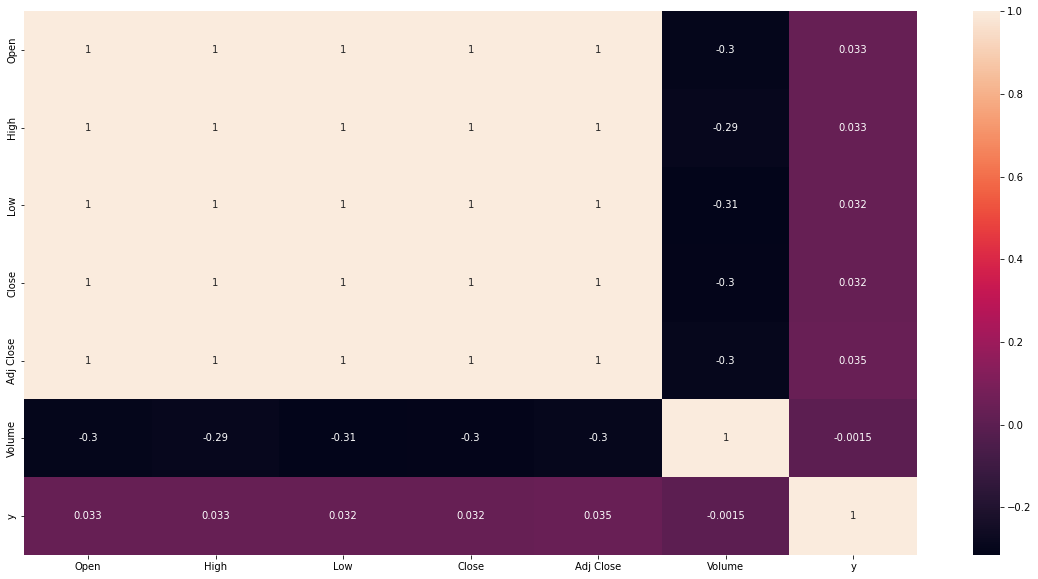

In [135]:
corr = scaled_ds.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot=True)
plt.rcParams["figure.figsize"]=(2,1)
plt.show()

<AxesSubplot:>

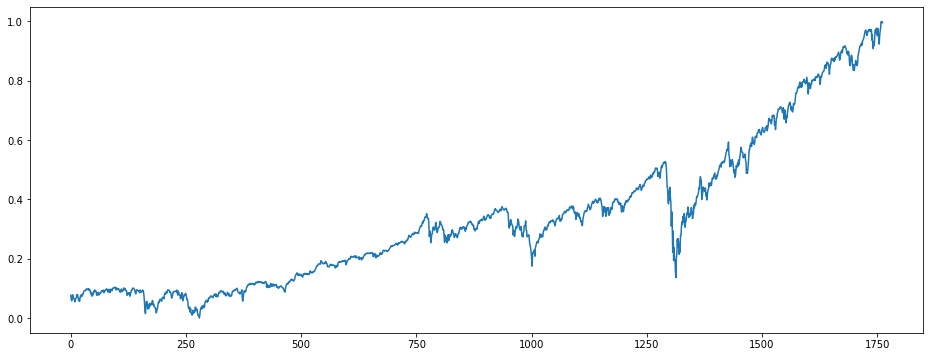

In [13]:
scaled_ds['Close'].plot(figsize=(16,6))

In [14]:
y1=scaled_ds['y']
x1=scaled_ds.drop(columns=['y'])

In [15]:
from sklearn.model_selection import train_test_split
x1_train,x1_val,y1_train,y1_val=train_test_split(x1,y1,test_size=0.2,stratify=scaled_ds['y'],random_state=42)
x1_train.shape,x1_val.shape,y1_train.shape,y1_val.shape

((1409, 6), (353, 6), (1409,), (353,))

### KNN 

In [136]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x1_train, y1_train)
neigh_preds=neigh.predict(x1_val)
print('Accuracy : {}'.format(accuracy_score(y1_val, neigh_preds)))
print('Precision : {}'.format(precision_score(neigh_preds,y1_val)))
print('Recall : {}'.format(recall_score(y1_val, neigh_preds)))
print('F1 Score : {}'.format(f1_score(y1_val, neigh_preds)))

Accuracy : 0.46175637393767704
Precision : 0.5435897435897435
Recall : 0.5435897435897435
F1 Score : 0.527363184079602


In [87]:
print('Confusion Matrix Of KNeighbors :\n',(confusion_matrix(y1_val,neigh_preds)))

Confusion Matrix Of KNeighbors :
 [[ 50 108]
 [ 67 128]]


### RandomForestClassifier

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=None, random_state=0,n_estimators=100)
rf.fit(x1_train, y1_train)
rf_preds=rf.predict(x1_val)
print('Random Forest')
print('Accuracy : {}'.format(accuracy_score(y1_val, rf_preds)))
print('Precision : {}'.format(precision_score(y1_val, rf_preds)))
print('Recall : {}'.format(recall_score(y1_val, rf_preds)))
print('F1 Score : {}'.format(f1_score(y1_val, rf_preds)))

Random Forest
Accuracy : 0.5354107648725213
Precision : 0.5714285714285714
Recall : 0.6358974358974359
F1 Score : 0.6019417475728155


In [89]:
print('Confusion Matrix Of RandomForest :\n',(confusion_matrix(y1_val,rf_preds)))

Confusion Matrix Of RandomForest :
 [[ 65  93]
 [ 71 124]]


### GradientBoostingClassifier

In [90]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gbc.fit(x1_train, y1_train)
gbc_preds=gbc.predict(x1_val)
print('Accuracy : {}'.format(accuracy_score(y1_val, gbc_preds)))
print('Precision : {}'.format(precision_score(y1_val, gbc_preds)))
print('Recall : {}'.format(recall_score(y1_val, gbc_preds)))
print('F1 Score : {}'.format(f1_score(y1_val, gbc_preds)))

Accuracy : 0.5354107648725213
Precision : 0.5584905660377358
Recall : 0.7589743589743589
F1 Score : 0.6434782608695653


In [91]:
print('Confusion Matrix Of GradientBoostingClassifier :\n',(confusion_matrix(y1_val,gbc_preds)))

Confusion Matrix Of GradientBoostingClassifier :
 [[ 41 117]
 [ 47 148]]


### SVC

In [92]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(x1_train, y1_train)
clf_preds=clf.predict(x1_val)
print('Accuracy : {}'.format(accuracy_score(y1_val, clf_preds)))
print('Precision : {}'.format(precision_score(y1_val, clf_preds)))
print('Recall : {}'.format(recall_score(y1_val, clf_preds)))
print('F1 Score : {}'.format(f1_score(y1_val, clf_preds)))

Accuracy : 0.5552407932011332
Precision : 0.560126582278481
Recall : 0.9076923076923077
F1 Score : 0.6927592954990216


In [93]:
print('Confusion Matrix Of Support Vector Machines :\n',(confusion_matrix(y1_val,clf_preds)))

Confusion Matrix Of Support Vector Machines :
 [[ 19 139]
 [ 18 177]]


### XGBClassifier

In [94]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x1_train, y1_train)
xgb_preds=xgb.predict(x1_val)
print('Accuracy : {}'.format(accuracy_score(y1_val, xgb_preds)))
print('Precision : {}'.format(precision_score(y1_val, xgb_preds)))
print('Recall : {}'.format(recall_score(y1_val, xgb_preds)))
print('F1 Score : {}'.format(f1_score(y1_val, xgb_preds)))

C:\Users\rohit\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:39:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.49291784702549574
Precision : 0.536697247706422
Recall : 0.6
F1 Score : 0.5665859564164649


In [95]:
print('Confusion Matrix Of Gradient Boosting Classifier :\n',(confusion_matrix(y1_val,xgb_preds)))

Confusion Matrix Of Gradient Boosting Classifier :
 [[ 57 101]
 [ 78 117]]


### Strategy 2 

In [96]:
sat2=spy_data

In [97]:
sat2

,Open,High,Low,Close,Adj Close,Volume,50MDA,200MDA
Date,,,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,180.342667,121465900,NaN,NaN
2015-01-05,204.169998,204.369995,201.350006,201.720001,177.085770,169632600,NaN,NaN
2015-01-06,202.089996,202.720001,198.860001,199.820007,175.417740,209151400,NaN,NaN
2015-01-07,201.419998,202.720001,200.880005,202.309998,177.603714,125346700,NaN,NaN
2015-01-08,204.009995,206.160004,203.990005,205.899994,180.755249,147217800,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-12-23,468.750000,472.190002,468.640015,470.600006,470.600006,56439700,461.747801,435.16185
2021-12-27,472.059998,477.309998,472.010010,477.260010,477.260010,56808600,462.443001,435.57785
2021-12-28,477.720001,478.809998,476.059998,476.869995,476.869995,47274600,463.063001,435.98015


In [98]:
sat2['50MDA']=sat2['Close'].rolling(50).mean()
sat2['200MDA']=sat2['Close'].rolling(200).mean()

In [99]:
sat2

,Open,High,Low,Close,Adj Close,Volume,50MDA,200MDA
Date,,,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,180.342667,121465900,NaN,NaN
2015-01-05,204.169998,204.369995,201.350006,201.720001,177.085770,169632600,NaN,NaN
2015-01-06,202.089996,202.720001,198.860001,199.820007,175.417740,209151400,NaN,NaN
2015-01-07,201.419998,202.720001,200.880005,202.309998,177.603714,125346700,NaN,NaN
2015-01-08,204.009995,206.160004,203.990005,205.899994,180.755249,147217800,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-12-23,468.750000,472.190002,468.640015,470.600006,470.600006,56439700,461.747801,435.16185
2021-12-27,472.059998,477.309998,472.010010,477.260010,477.260010,56808600,462.443001,435.57785
2021-12-28,477.720001,478.809998,476.059998,476.869995,476.869995,47274600,463.063001,435.98015


In [100]:
sat2=sat2.dropna().copy()

In [101]:
sat2

,Open,High,Low,Close,Adj Close,Volume,50MDA,200MDA
Date,,,,,,,,
2015-10-16,202.830002,203.289993,201.919998,203.270004,181.051239,114580100,198.635801,206.04220
2015-10-19,202.500000,203.369995,202.130005,203.369995,181.140305,76523900,198.544201,206.03190
2015-10-20,202.850006,203.839996,202.550003,203.110001,180.908737,78448500,198.395001,206.03885
2015-10-21,203.610001,203.789993,201.649994,201.850006,179.786453,102038000,198.258601,206.04900
2015-10-22,202.979996,205.509995,201.850006,205.259995,182.823700,174911700,198.185401,206.06375
...,...,...,...,...,...,...,...,...
2021-12-23,468.750000,472.190002,468.640015,470.600006,470.600006,56439700,461.747801,435.16185
2021-12-27,472.059998,477.309998,472.010010,477.260010,477.260010,56808600,462.443001,435.57785
2021-12-28,477.720001,478.809998,476.059998,476.869995,476.869995,47274600,463.063001,435.98015


In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()
scaler2.fit(sat2)
scaled2 = scaler2.fit_transform(sat2)
scaled_sat2 = pd.DataFrame(scaled2, columns=sat2.columns)

In [103]:
scaled_sat2

,Open,High,Low,Close,Adj Close,Volume,50MDA,200MDA
0,0.069319,0.065073,0.070838,0.069276,0.054871,0.253555,0.020392,0.020729
1,0.068203,0.065344,0.071550,0.069615,0.055155,0.151240,0.020055,0.020685
2,0.069387,0.066938,0.072973,0.068733,0.054417,0.156415,0.019504,0.020715
3,0.071958,0.066768,0.069923,0.064456,0.050839,0.219836,0.019001,0.020758
4,0.069826,0.072601,0.070601,0.076030,0.060523,0.415759,0.018731,0.020820
...,...,...,...,...,...,...,...,...
1558,0.968943,0.976907,0.974851,0.976648,0.978064,0.097243,0.991030,0.993122
1559,0.980141,0.994269,0.986273,0.999253,0.999299,0.098235,0.993595,0.994887
1560,0.999290,0.999356,1.000000,0.997929,0.998055,0.072603,0.995882,0.996595
1561,0.996786,0.998508,0.999526,1.000000,1.000000,0.092036,0.998117,0.998326


In [104]:
scaled_sat2.describe()

,Open,High,Low,Close,Adj Close,Volume,50MDA,200MDA
count,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000
mean,0.369026,0.368912,0.368707,0.368644,0.364293,0.179575,0.347292,0.317461
std,0.243193,0.244803,0.242456,0.244038,0.248101,0.125074,0.253886,0.252980
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.191008,0.187809,0.192160,0.189329,0.177227,0.099908,0.159898,0.099280
50%,0.323725,0.322923,0.322363,0.322653,0.314712,0.145319,0.300326,0.312172
75%,0.476691,0.481078,0.476766,0.478379,0.484544,0.215651,0.458083,0.432705
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [105]:
y2 = np.where(scaled_sat2['50MDA'].shift(-1) > scaled_sat2['200MDA'], 1, -1)

In [106]:
scaled_sat2['y2']=y2

In [107]:
sat2=scaled_sat2.copy()

In [108]:
scaled_sat2=scaled_sat2.drop(columns=['Open','High','Low','Close','Adj Close','Volume'])

In [109]:
scaled_sat2

,50MDA,200MDA,y2
0,0.020392,0.020729,-1
1,0.020055,0.020685,-1
2,0.019504,0.020715,-1
3,0.019001,0.020758,-1
4,0.018731,0.020820,-1
...,...,...,...
1558,0.991030,0.993122,1
1559,0.993595,0.994887,1
1560,0.995882,0.996595,1
1561,0.998117,0.998326,1


<AxesSubplot:>

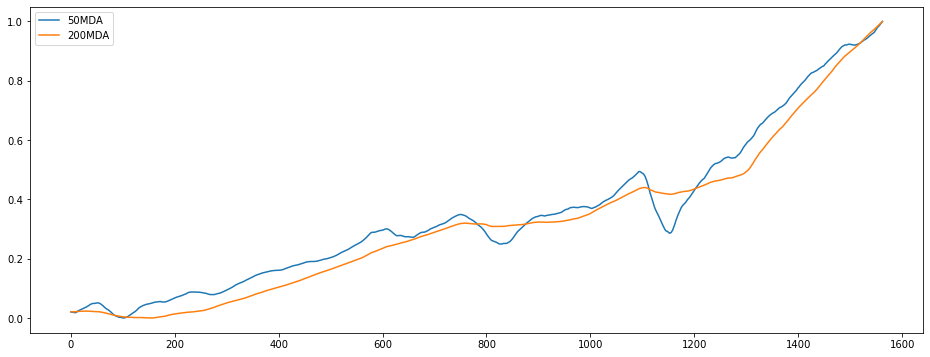

In [110]:
scaled_sat2[['50MDA','200MDA']].plot(figsize=(16,6))

In [111]:
y2=scaled_sat2['y2']
x2=scaled_sat2.drop(columns=['y2'])

### Splitting data (80%:20%)

In [112]:
from sklearn.model_selection import train_test_split
x2_train,x2_val,y2_train,y2_val=train_test_split(x2,y2,test_size=0.2,stratify=scaled_sat2['y2'],random_state=42)
x2_train.shape,x2_val.shape,y2_train.shape,y2_val.shape

((1250, 2), (313, 2), (1250,), (313,))

### KNeighborClassifier (neigh)

In [137]:
from sklearn.neighbors import KNeighborsClassifier
neigh2 = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x2_train, y2_train)
neigh_preds2=neigh.predict(x2_val)
print('Accuracy : {}'.format(accuracy_score(y2_val, neigh_preds2)))
print('Precision : {}'.format(precision_score(y2_val,neigh_preds2)))
print('Recall : {}'.format(recall_score(y2_val, neigh_preds2)))
print('F1 Score : {}'.format(f1_score(y2_val, neigh_preds2)))

Accuracy : 0.9936102236421726
Precision : 1.0
Recall : 0.9923664122137404
F1 Score : 0.9961685823754789


In [114]:
print('Confusion Matrix Of KNeighbors :\n',(confusion_matrix(y2_val,neigh_preds)))

Confusion Matrix Of KNeighbors :
 [[ 51   0]
 [  3 259]]


### RandomForestClassifier (rf)

In [126]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(max_depth=None, random_state=0,n_estimators=100)
rf.fit(x2_train, y2_train)
rf_preds2=rf.predict(x2_val)
print('Random Forest')
print('Accuracy : {}'.format(accuracy_score(y2_val, rf_preds2)))
print('Precision : {}'.format(precision_score(y2_val, rf_preds2)))
print('Recall : {}'.format(recall_score(y2_val, rf_preds2)))
print('F1 Score : {}'.format(f1_score(y2_val, rf_preds2)))

Random Forest
Accuracy : 0.9904153354632588
Precision : 0.9961685823754789
Recall : 0.9923664122137404
F1 Score : 0.9942638623326959


In [116]:
print('Confusion Matrix Of RandomForest :\n',(confusion_matrix(y2_val,rf_preds)))

Confusion Matrix Of RandomForest :
 [[ 50   1]
 [  2 260]]


###  GradientBoostingClassifier (gbc)

In [142]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=3, random_state=0)
gbc.fit(x2_train, y2_train)
gbc_preds=gbc.predict(x2_val)
print('Accuracy : {}'.format(accuracy_score(y2_val, gbc_preds)))
print('Precision : {}'.format(precision_score(y2_val, gbc_preds)))
print('Recall : {}'.format(recall_score(y2_val, gbc_preds)))
print('F1 Score : {}'.format(f1_score(y2_val, gbc_preds)))

Accuracy : 0.9936102236421726
Precision : 0.9961832061068703
Recall : 0.9961832061068703
F1 Score : 0.9961832061068703


In [118]:
print('Confusion Matrix Of GradientBoostingClassifier :\n',(confusion_matrix(y2_val,gbc_preds)))

Confusion Matrix Of GradientBoostingClassifier :
 [[ 50   1]
 [  2 260]]


### Support Vector Machines (SVMs) 

In [119]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(x2_train, y2_train)
clf_preds=clf.predict(x2_val)
print('Accuracy : {}'.format(accuracy_score(y2_val, clf_preds)))
print('Precision : {}'.format(precision_score(y2_val, clf_preds)))
print('Recall : {}'.format(recall_score(y2_val, clf_preds)))
print('F1 Score : {}'.format(f1_score(y2_val, clf_preds)))

Accuracy : 0.9488817891373802
Precision : 0.948905109489051
Recall : 0.9923664122137404
F1 Score : 0.9701492537313432


In [120]:
print('Confusion Matrix Of Support Vector Machines :\n',(confusion_matrix(y2_val,clf_preds)))

Confusion Matrix Of Support Vector Machines :
 [[ 37  14]
 [  2 260]]


###  XGB Classifier(xgb)

In [145]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x2_train, y2_train)
xgb_preds=xgb.predict(x2_val)
print('Accuracy : {}'.format(accuracy_score(y2_val, xgb_preds)))
print('Precision : {}'.format(precision_score(y2_val, xgb_preds)))
print('Recall : {}'.format(recall_score(y2_val, xgb_preds)))
print('F1 Score : {}'.format(f1_score(y2_val, xgb_preds)))

[20:25:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.9904153354632588
Precision : 1.0
Recall : 0.9885496183206107
F1 Score : 0.9942418426103647


C:\Users\rohit\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [122]:
print('Confusion Matrix Of Gradient Boosting Classifier :\n',(confusion_matrix(y2_val,xgb_preds)))

Confusion Matrix Of Gradient Boosting Classifier :
 [[ 51   0]
 [  3 259]]


### Hyper Parameter Tunning

In [129]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=2, random_state=1)
gbc.fit(x2_train, y2_train)
gbc_preds1=gbc.predict(x2_val)
print('Accuracy : {}'.format(accuracy_score(y2_val, gbc_preds1)))
print('Precision : {}'.format(precision_score(y2_val, gbc_preds1)))
print('Recall : {}'.format(recall_score(y2_val, gbc_preds1)))
print('F1 Score : {}'.format(f1_score(y2_val, gbc_preds1)))

Accuracy : 0.987220447284345
Precision : 0.9923664122137404
Recall : 0.9923664122137404
F1 Score : 0.9923664122137404


In [130]:
print('Confusion Matrix Of GradientBoostingClassifier :\n',(confusion_matrix(y2_val,gbc_preds1)))

Confusion Matrix Of GradientBoostingClassifier :
 [[ 49   2]
 [  2 260]]


In [143]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=4, random_state=1)
gbc.fit(x2_train, y2_train)
gbc_preds2=gbc.predict(x2_val)
print('Accuracy : {}'.format(accuracy_score(y2_val, gbc_preds2)))
print('Precision : {}'.format(precision_score(y2_val, gbc_preds2)))
print('Recall : {}'.format(recall_score(y2_val, gbc_preds2)))
print('F1 Score : {}'.format(f1_score(y2_val, gbc_preds2)))

Accuracy : 0.9936102236421726
Precision : 0.9961832061068703
Recall : 0.9961832061068703
F1 Score : 0.9961832061068703


In [131]:
print('Confusion Matrix Of GradientBoostingClassifier :\n',(confusion_matrix(y2_val,gbc_preds2)))

Confusion Matrix Of GradientBoostingClassifier :
 [[ 50   1]
 [  1 261]]


In [132]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=6,random_state=1)
gbc.fit(x2_train, y2_train)
gbc_preds3=gbc.predict(x2_val)
print('Accuracy : {}'.format(accuracy_score(y2_val, gbc_preds3)))
print('Precision : {}'.format(precision_score(y2_val, gbc_preds3)))
print('Recall : {}'.format(recall_score(y2_val, gbc_preds3)))
print('F1 Score : {}'.format(f1_score(y2_val, gbc_preds3)))

Accuracy : 0.9904153354632588
Precision : 0.9961685823754789
Recall : 0.9923664122137404
F1 Score : 0.9942638623326959


In [133]:
print('Confusion Matrix Of GradientBoostingClassifier :\n',(confusion_matrix(y2_val,gbc_preds3)))

Confusion Matrix Of GradientBoostingClassifier :
 [[ 50   1]
 [  2 260]]
